# 1 - Introduction

```
Name      : Muhamad Arif Rachman Hatab

Batch     : FTDS-017-RMT

Dataset   : churn.csv, contains customer information and status with customer churn scoring.

Objective : Predict customer probability of churn, in helping company to minimalize customer's churn rate.
```

# 2 - Import Libraries

In [1]:
# Dataframe Prep
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from scipy.stats import chi2_contingency

# Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model 

# Model Inferencing
import pickle
import json

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - Data Loading

In [2]:
# Load Dataset
data_origin = pd.read_csv('churn.csv')

# Make Copy
data = data_origin.copy()

# Sample for Model Inferencing
data_inference = data.sample(n=2, random_state=11)
print('data shape           : ', data.shape)
print('data inference shape : ', data_inference.shape)

data shape           :  (37010, 22)
data inference shape :  (2, 22)


In [3]:
# Check Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [4]:
# Display Head
pd.set_option('display.max_column', None)
data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


# 4 - EDA

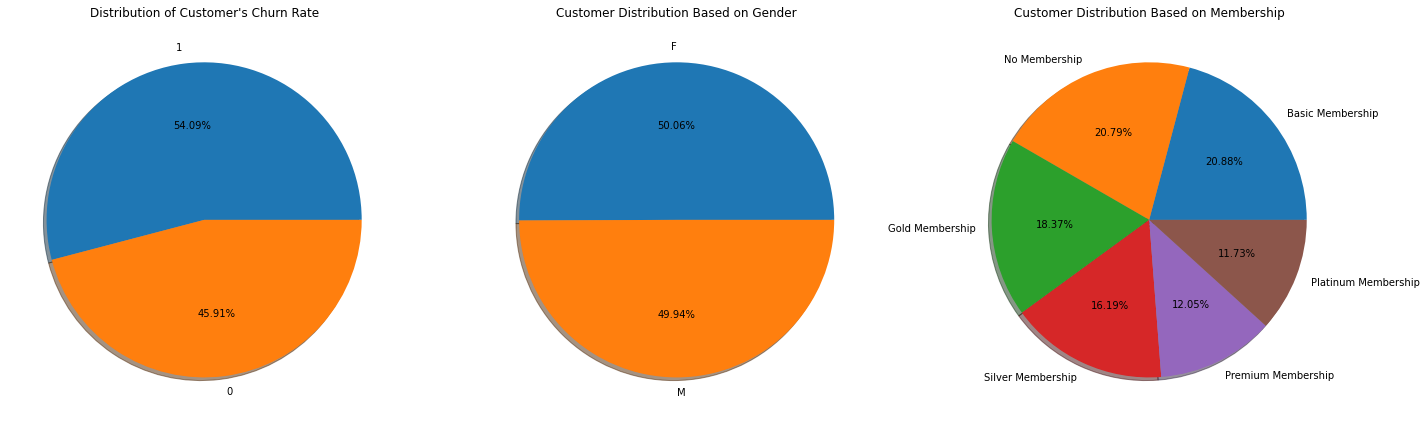

In [5]:
# Customer Demographics
plt.figure(figsize=(20,20))

a = data['churn_risk_score'].value_counts()
plt.subplot(131)
plt.pie(a, autopct='%1.2f%%', labels=a.index, shadow=True)
plt.title("Distribution of Customer's Churn Rate")

b = data['gender'].value_counts()
plt.subplot(132)
plt.pie(b, autopct='%1.2f%%', labels=b.index, shadow=True)
plt.title("Customer Distribution Based on Gender")

c = data['membership_category'].value_counts()
plt.subplot(133)
plt.pie(c, autopct='%1.2f%%', labels=c.index, shadow=True)
plt.title("Customer Distribution Based on Membership")

plt.tight_layout()
plt.show()

Visualization above shows that the distribution between customer with churn customers (54.09 %) and not churn customers (45.91 %) is somewhat balanced with majority is slightly leaning towards churning.

There are almost the same amount of female and male customers, and it looks like customer distribution per membership is approximately close.

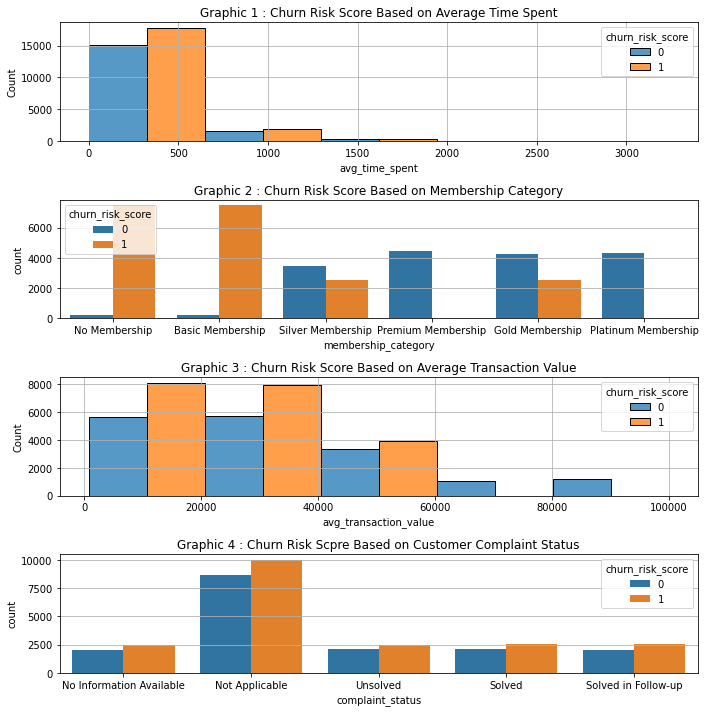

In [6]:
# Visualize Customers Distribution on Features
plt.figure(figsize=(10,10))

plt.subplot(411)
plt.grid()
sns.histplot(data=data, x='avg_time_spent', hue='churn_risk_score', multiple='dodge', bins=5)
plt.title('Graphic 1 : Churn Risk Score Based on Average Time Spent')

plt.subplot(412)
plt.grid()
sns.countplot(data=data, x='membership_category', hue='churn_risk_score')
plt.title('Graphic 2 : Churn Risk Score Based on Membership Category')

plt.subplot(413)
plt.grid()
sns.histplot(data=data, x='avg_transaction_value', hue='churn_risk_score', bins=5, multiple='dodge')
plt.title('Graphic 3 : Churn Risk Score Based on Average Transaction Value')

plt.subplot(414)
plt.grid()
sns.countplot(data=data, x='complaint_status', hue='churn_risk_score')
plt.title('Graphic 4 : Churn Risk Scpre Based on Customer Complaint Status')

plt.tight_layout()
plt.show()

Graphic 1 shows, majority of customers have average time spent on the website below 500, but this doesnt really show any correlation towards customer churn risk score since for every group of average time spent, there are relatively the same portion for customer with possibility of churning and not in each group.

Graphic 2 clearly shows that there are more churning customer with no membership applied and basic membership compared to other group of membership category.

Graphic 3 somewhat shows that there is a relatively higher possibility of churning for customer with average transaction value below 40,000.

# 5 - Feature Engineering

## 5.1 - Split Features and Target

In [7]:
# Split x and y
x = data.drop('churn_risk_score', axis=1)
y = data['churn_risk_score']

In [8]:
# Split between Train-Set, Val-Set and Test-Set
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, random_state=28)

# Split Train-Set and Val-Set
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.15, random_state=28)

print('Train Size : ', x_train.shape)
print('Val Size   : ', x_val.shape)
print('Test Size  : ', x_test.shape)

Train Size :  (26739, 21)
Val Size   :  (4719, 21)
Test Size  :  (5552, 21)


## 5.2 - Handling Missing Values

In [9]:
# Check Missing Values in x_train
x_train.isna().sum()

user_id                            0
age                                0
gender                            46
region_category                 3926
membership_category                0
joining_date                       0
joined_through_referral         3942
preferred_offer_types            224
medium_of_operation             3939
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [10]:
# Check Missing Values in x_val
x_val.isna().sum()

user_id                           0
age                               0
gender                            7
region_category                 692
membership_category               0
joining_date                      0
joined_through_referral         712
preferred_offer_types            31
medium_of_operation             670
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [11]:
# Check Missing Values in x_test
x_test.isna().sum()

user_id                           0
age                               0
gender                            6
region_category                 813
membership_category               0
joining_date                      0
joined_through_referral         788
preferred_offer_types            33
medium_of_operation             786
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [12]:
# Missing Values in region_category
pd.set_option('display.max_columns', None)
x_train[x_train.region_category.isnull()].head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
35693,a9d0eab3a3995a0f,17,M,NaN,Silver Membership,2016-09-29,No,Gift Vouchers/Coupons,Both,Wi-Fi,13:33:34,19,353.210000,31784.16,6.000000,737.430000,Yes,No,No,Not Applicable,User Friendly Website
21668,824e00e7f4ff3704,34,F,NaN,No Membership,2017-08-19,NaN,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,12:26:45,4,218.750000,1813.76,49.171147,574.650000,Yes,No,No,Not Applicable,Poor Product Quality
17246,b2b0ea160df50adf,42,M,NaN,No Membership,2017-05-10,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,22:32:40,15,33.170000,40560.23,0.000000,54.420417,Yes,No,Yes,Solved in Follow-up,Poor Website
32066,8c581b2d90e4987e,64,F,NaN,Platinum Membership,2016-12-04,No,Without Offers,Desktop,Mobile_Data,09:26:27,19,1158.772032,28188.07,25.000000,777.550000,No,Yes,No,Not Applicable,Poor Product Quality
36143,bfcca854eb79496f,51,M,NaN,No Membership,2015-04-07,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,23:44:42,7,31.550000,48426.03,6.000000,558.240000,No,Yes,No,Not Applicable,Too many ads


In [13]:
# Missing Values in joined_through_referral
x_train[x_train.joined_through_referral.isnull()].head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
21668,824e00e7f4ff3704,34,F,NaN,No Membership,2017-08-19,NaN,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,12:26:45,4,218.75,1813.76,49.171147,574.650000,Yes,No,No,Not Applicable,Poor Product Quality
17246,b2b0ea160df50adf,42,M,NaN,No Membership,2017-05-10,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,22:32:40,15,33.17,40560.23,0.000000,54.420417,Yes,No,Yes,Solved in Follow-up,Poor Website
33979,80b450a9ad14749e,19,F,NaN,No Membership,2017-03-16,NaN,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:42:14,12,316.68,27324.46,0.000000,634.870000,Yes,Yes,No,Not Applicable,Poor Customer Service
33173,ab2522db87cd2f08,13,F,City,Basic Membership,2017-03-02,NaN,Without Offers,Smartphone,Fiber_Optic,06:50:35,5,199.33,16208.74,6.000000,0.000000,Yes,No,Yes,Solved,Too many ads
17708,94d03a446917d285,49,F,City,Gold Membership,2015-06-02,NaN,Without Offers,Desktop,Mobile_Data,08:57:48,14,362.79,40941.53,22.000000,0.000000,Yes,No,No,Not Applicable,Poor Website


In [14]:
# Missing Values in preferred_offer_types
x_train[x_train.preferred_offer_types.isnull()].head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
33168,b32f3f93eda7835e,10,M,Town,Gold Membership,2017-10-28,NaN,NaN,Smartphone,Mobile_Data,18:02:00,20,243.73,34971.63,18.0,769.260000,No,Yes,Yes,Unsolved,No reason specified
29671,b5ed1f2632b49186,35,F,Town,No Membership,2015-12-17,No,NaN,NaN,Mobile_Data,09:17:21,25,119.40,19071.36,0.0,680.300000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality
36232,887a1d3f3ad3ff15,63,M,NaN,Basic Membership,2016-08-25,NaN,NaN,Smartphone,Wi-Fi,09:54:28,12,30.26,26346.31,24.0,1145.229831,No,Yes,No,Not Applicable,Poor Customer Service
2282,9f94b85259b312de,30,F,City,Gold Membership,2015-06-24,Yes,NaN,Smartphone,Fiber_Optic,23:58:26,11,85.57,37386.16,16.0,794.810000,Yes,No,Yes,Unsolved,Too many ads
12826,9d821cd0fce72b46,54,F,Town,Silver Membership,2015-11-25,Yes,NaN,NaN,Wi-Fi,08:11:10,8,829.59,28704.53,26.0,611.640000,Yes,Yes,No,Not Applicable,No reason specified


In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26739 entries, 33522 to 15602
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       26739 non-null  object 
 1   age                           26739 non-null  int64  
 2   gender                        26693 non-null  object 
 3   region_category               22813 non-null  object 
 4   membership_category           26739 non-null  object 
 5   joining_date                  26739 non-null  object 
 6   joined_through_referral       22797 non-null  object 
 7   preferred_offer_types         26515 non-null  object 
 8   medium_of_operation           22800 non-null  object 
 9   internet_option               26739 non-null  object 
 10  last_visit_time               26739 non-null  object 
 11  days_since_last_login         26739 non-null  int64  
 12  avg_time_spent                26739 non-null  float64
 1

Looking at analysis above, missing values exist in column `gender`, `region_category`, `membership_category`, `joining_date`, `joined_through_referral`, `preferred_offer_types`, `medium_of_operation` seem to be classified as values that are missing completely at random, with all columns except `age` have object data type and `age` itself has integer data type, hence we will impute missing values with median imputation for column `age` and impute with mode for the other columns (categorical data type).

Imputing will be done in pipeline section.

## 5.3 - Pipeline

Correlation check can be initialize after we handle missing values. Column user_id and joining_date and last login can be included since it personally do not related to our target.

In [16]:
# Drop user_id
drop1 = ['user_id', 'joining_date', 'last_visit_time']

x_train = x_train.drop(drop1, axis=1)
x_val = x_val.drop(drop1, axis=1)
x_test = x_test.drop(drop1, axis=1)

print('Train Size : ', x_train.shape)
print('Val Size   : ', x_val.shape)
print('Test Size  : ', x_test.shape)

Train Size :  (26739, 18)
Val Size   :  (4719, 18)
Test Size  :  (5552, 18)


In [17]:
# Get Numerical Columns and Categorical Columns
num_col = x_train.select_dtypes(include=np.number).columns.tolist()
cat_col = x_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns    : ', num_col)
print('Categorical Columns  : ', cat_col)

Numerical Columns    :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns  :  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


### Imputing Missing Values

From our previous analysis, it is shown that all missing values seem to be MCAR thus:

Numerical columns will be imputed with strategy set to median since most of column distributions are skewed, while categorical columns will be imputed with strategy set to mode since we dont want to change the balance of the categorical data. 

In [18]:
# Pipeline for imputting
num_impute = make_pipeline(SimpleImputer(strategy='median'))
cat_impute = make_pipeline(SimpleImputer(strategy='most_frequent'))

impute_pipe = ColumnTransformer([
                  ('num_impute', num_impute, num_col),
                  ('cat_impute', cat_impute, cat_col)
              ])

In [19]:
# Impute Missing Values in All X Sets
x_train = impute_pipe.fit_transform(x_train)
x_val = impute_pipe.transform(x_val)
x_test = impute_pipe.transform(x_test)

### Feature Selection

In [20]:
# New DataFrame for Correlation Check
col = num_col+cat_col
x_train_df = pd.DataFrame(x_train, columns=col)
x_val_df = pd.DataFrame(x_val, columns=col)
x_test_df = pd.DataFrame(x_test, columns=col)
x_train_df.shape

(26739, 18)

In [21]:
# Change num col dtype from object to float
x_train_df[num_col] = x_train_df[num_col].astype(float)
x_train_df[cat_col] = x_train_df[cat_col].astype(str)

x_val_df[num_col] = x_val_df[num_col].astype(float)
x_val_df[cat_col] = x_val_df[cat_col].astype(str)

x_test_df[num_col] = x_test_df[num_col].astype(float)
x_test_df[cat_col] = x_test_df[cat_col].astype(str)

In [22]:
x_train_df.shape

(26739, 18)

In [23]:
# Concat Features and Target for Correlation Check
x_train_df = pd.concat([x_train_df.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1, )
x_train_df.shape

(26739, 19)

In [24]:
# Correlation Check with chi2 
chi2_check = []
for i in col:
    if chi2_contingency(pd.crosstab(x_train_df['churn_risk_score'], x_train_df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [col, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                          Column                      Hypothesis
0                            age  Fail to Reject Null Hypothesis
1          days_since_last_login  Fail to Reject Null Hypothesis
2                 avg_time_spent  Fail to Reject Null Hypothesis
3          avg_transaction_value  Fail to Reject Null Hypothesis
4       avg_frequency_login_days          Reject Null Hypothesis
5               points_in_wallet          Reject Null Hypothesis
6                         gender  Fail to Reject Null Hypothesis
7                region_category          Reject Null Hypothesis
8            membership_category          Reject Null Hypothesis
9        joined_through_referral          Reject Null Hypothesis
10         preferred_offer_types          Reject Null Hypothesis
11           medium_of_operation          Reject Null Hypothesis
12               internet_option  Fail to Reject Null Hypothesis
13         used_special_discount  Fail to Reject Null Hypothesis
14  offer_application_pre

Features with hypothesis null rejected means that these features have fairly low correlation towards target, hence we will exclude columns which null hypothesis rejected.

It is not clear why column membership category considered to be fairly low correlated to the target columns while from EDA, it was shown that this column is somewhat showing correlation towards customers possinility of churning.

While this feature selection is personally, presumably unreliable, writer will keep this decision, and assume that this will decline the end model performance' efficiency.

In [25]:
# Selected Feature
exclude = ['avg_frequency_login_days', 'points_in_wallet', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'offer_application_preference', 'feedback']
selected = [x for x in col if x not in exclude]
selected

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'gender',
 'internet_option',
 'used_special_discount',
 'past_complaint',
 'complaint_status']

In [26]:
# Include Only Selected For All Set
x_train_df = x_train_df[selected]
x_val_df = x_val_df[selected]
x_test_df = x_test_df[selected]

### Scaling and Encoding

Since our data have skewed distribution we will use MinMaxScaler to scale the data and encoding will be done with OneHotEncoder since we have multiclass data in some of categorical columns.

In [27]:
# Get New Numerical Columns and Categorical Columns
num_columns = x_train_df.select_dtypes(include=np.number).columns.tolist()
cat_columns = x_train_df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns    : ', num_columns)
print('Categorical Columns  : ', cat_columns)

Numerical Columns    :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value']
Categorical Columns  :  ['gender', 'internet_option', 'used_special_discount', 'past_complaint', 'complaint_status']


In [28]:
# Pipeline for Numerical Columns Preprocessing
num_pipe = make_pipeline(MinMaxScaler())

# Pipeline for Categorical Columns Preprocessing
cat_pipe = make_pipeline(OneHotEncoder())

# Complete Preprocessing pipeline
prep_pipe = ColumnTransformer([
            ('num_pipe', num_pipe, num_columns),
            ('cat_pipe', cat_pipe, cat_columns)
            ])

In [29]:
# Fit & Transform w/ Pipeline
x_train_final = prep_pipe.fit_transform(x_train_df)
x_val_final = prep_pipe.transform(x_val_df)
x_test_final = prep_pipe.transform(x_test_df)
x_train_final.shape

(26739, 18)

# 6 - Sequential API

In [30]:
# Input Data Pipeline
train_pipe = tf.data.Dataset.from_tensor_slices((x_train_final, y_train)).batch(10).shuffle(10).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((x_test_final, y_test)).batch(10)
val_pipe = tf.data.Dataset.from_tensor_slices((x_val_final, y_val)).batch(10)

## 6.1 - Model Definition

In [31]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

This section is arranged for baseline models. Below we will only set epochs parameter for both models to 20 to see both model performances.

Since our features only consist of positive values, we will use relu as the activation functions for both hidden layer, since this activation function does not allow negative values, as for activation function in output layer will be set to sigmoid since we have binary categorical target.

In [32]:
model_sequential = Sequential()
model_sequential.add(Dense(10, activation='relu', input_shape=(18,))) # Hidden Layer 1
model_sequential.add(Dense(5, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['Precision', 'Recall'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


Optimizer for sequential API will be set to Adam and functional API will be set to AdaMax, since this optimizer is generally considered to be the most flexible optimizer in both computational cost and performance efficiency.

Loss set to binary crossentropy since we have binary categorical target, and metrics are actually intented to be focused to recall, since we wanted to minimze the number of False Negative which in reality are the number of customer that actually churning but predicted as not churning, to find all possibly churning customers with its correlated features hence will help the company decision makers.

## 6.2 - Model Training

In [33]:
# Train Model
%%time
history_seq = model_sequential.fit(train_pipe, epochs=20, validation_data=val_pipe)

Epoch 1/20
2674/2674 [==============================] - 6s 2ms/step - loss: 0.6836 - precision: 0.5605 - recall: 0.8563 - val_loss: 0.6670 - val_precision: 0.5925 - val_recall: 0.7477
Epoch 2/20
2674/2674 [==============================] - 5s 2ms/step - loss: 0.6590 - precision: 0.5845 - recall: 0.8642 - val_loss: 0.6455 - val_precision: 0.5924 - val_recall: 0.8954
Epoch 3/20
2674/2674 [==============================] - 5s 2ms/step - loss: 0.6445 - precision: 0.5843 - recall: 0.9285 - val_loss: 0.6385 - val_precision: 0.5846 - val_recall: 0.9675
Epoch 4/20
2674/2674 [==============================] - 7s 3ms/step - loss: 0.6388 - precision: 0.5847 - recall: 0.9533 - val_loss: 0.6376 - val_precision: 0.5829 - val_recall: 0.9902
Epoch 5/20
2674/2674 [==============================] - 5s 2ms/step - loss: 0.6365 - precision: 0.5847 - recall: 0.9658 - val_loss: 0.6334 - val_precision: 0.5860 - val_recall: 0.9933
Epoch 6/20
2674/2674 [==============================] - 5s 2ms/step - loss: 0.63

## 6.3 - Model Evaluation

In [34]:
# DataFrame for Evaluation Results
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,precision,recall,val_loss,val_precision,val_recall
0,0.683637,0.560472,0.856284,0.666980,0.592489,0.747748
1,0.659028,0.584541,0.864164,0.645534,0.592381,0.895417
2,0.644456,0.584312,0.928453,0.638457,0.584615,0.967489
3,0.638766,0.584662,0.953339,0.637600,0.582891,0.990208
4,0.636499,0.584683,0.965782,0.633414,0.585952,0.993341
5,0.634818,0.585646,0.970206,0.634018,0.584425,0.996475
6,0.634032,0.585475,0.976358,0.632773,0.584081,0.994516
7,0.633270,0.584937,0.979262,0.632991,0.584368,0.995691
8,0.632819,0.584973,0.982234,0.629564,0.586079,0.989424
9,0.632416,0.584727,0.983478,0.632699,0.584154,0.999217


<Figure size 864x720 with 0 Axes>

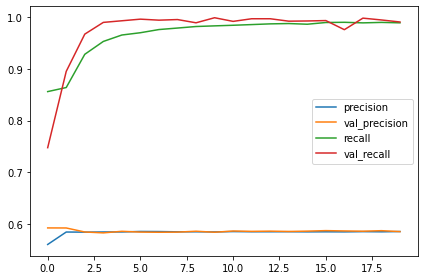

<Figure size 864x720 with 0 Axes>

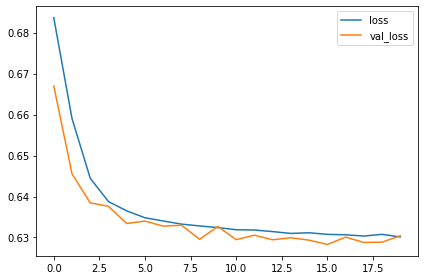

In [35]:
# Visualize Training Result
plt.figure(figsize=(12,10))
history_seq_df[['precision', 'val_precision', 'recall', 'val_recall']].plot()
plt.tight_layout()

plt.figure(figsize=(12,10))
history_seq_df[['loss', 'val_loss']].plot()
plt.tight_layout()

Evaluation result above shows that last recorded performance is as follow:
```
1. loss       : 0.63
2. val_loss   : 0.63
3. recall     : 0.989
4. val_recall : 0.990
```
Although the visualization shows that the model has early steady sate and convergence end point for loss and val_loss, it seemed that the error evaluated during training and validation is high, which at .63, while we already predicted that this is going to happen, we will have to see performances of each model training in Functional API and Improvement sections to furhter decide on this matter.

As for recall value, we have .989 and .990 for training and validation respectively. Looking only at this recall result, we can interprete that the model is highly efficient in predicting customer with high probability of churning, and with both recall value of training and validation are approximately the same indicate that this current model is already good fit in train set.

Visualization

In [36]:
# Evaluate Test-Set
y_pred_seq = model_sequential.predict(x_test_final)
y_pred_seq = np.where(y_pred_seq >=0.55, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.19      0.31      2553
           1       0.58      0.98      0.73      2999

    accuracy                           0.61      5552
   macro avg       0.73      0.58      0.52      5552
weighted avg       0.72      0.61      0.54      5552



Above we see that despite the marvelous score in recall, the model actually has poor performance in correctly predicting false event, which in this case is not churning, this resulting in low overall accuracy at 61% in test set.

# 7 - Functional API

## 7.1 - Model Definition

In [43]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [44]:
input_layer = Input(shape=(18,))
hidden_layer1 = Dense(5, activation='relu')(input_layer)
hidden_layer2 = Dense(5, activation='relu')(hidden_layer1)

concat_layer = concatenate([input_layer, hidden_layer2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='AdaMax',
                         metrics=['Precision', 'Recall'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 5)            95          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 5)            30          ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 23)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

## 7.2 - Model Training

In [45]:
# Train Model
%%time
history_func = model_functional.fit(train_pipe, epochs=20, validation_data=val_pipe)

Epoch 1/20
2674/2674 [==============================] - 6s 2ms/step - loss: 0.7051 - precision: 0.5596 - recall: 0.6844 - val_loss: 0.6766 - val_precision: 0.5854 - val_recall: 0.7462
Epoch 2/20
2674/2674 [==============================] - 5s 2ms/step - loss: 0.6736 - precision: 0.5847 - recall: 0.8334 - val_loss: 0.6670 - val_precision: 0.6009 - val_recall: 0.7450
Epoch 3/20
2674/2674 [==============================] - 5s 2ms/step - loss: 0.6683 - precision: 0.5870 - recall: 0.7759 - val_loss: 0.6637 - val_precision: 0.5966 - val_recall: 0.6847
Epoch 4/20
2674/2674 [==============================] - 5s 2ms/step - loss: 0.6666 - precision: 0.5861 - recall: 0.7522 - val_loss: 0.6617 - val_precision: 0.5977 - val_recall: 0.7054
Epoch 5/20
2674/2674 [==============================] - 5s 2ms/step - loss: 0.6657 - precision: 0.5869 - recall: 0.7469 - val_loss: 0.6605 - val_precision: 0.5976 - val_recall: 0.7113
Epoch 6/20
2674/2674 [==============================] - 7s 3ms/step - loss: 0.66

## 7.3 - Model Evaluation

In [46]:
# DataFrame for Evaluation Results
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,precision,recall,val_loss,val_precision,val_recall
0,0.705127,0.559575,0.684363,0.676591,0.585433,0.746181
1,0.673590,0.584732,0.833402,0.666974,0.600948,0.745006
2,0.668269,0.586999,0.775888,0.663682,0.596587,0.684685
3,0.666610,0.586103,0.752178,0.661673,0.597743,0.705445
4,0.665750,0.586909,0.746924,0.660521,0.597565,0.711320
5,0.665091,0.587307,0.745887,0.659677,0.595950,0.703094
6,0.664157,0.586757,0.747339,0.658697,0.596457,0.712103
7,0.663148,0.586792,0.753629,0.657245,0.598395,0.730121
8,0.661786,0.586086,0.760542,0.655437,0.597781,0.738739
9,0.659846,0.585408,0.772086,0.653441,0.598098,0.739130


<Figure size 864x720 with 0 Axes>

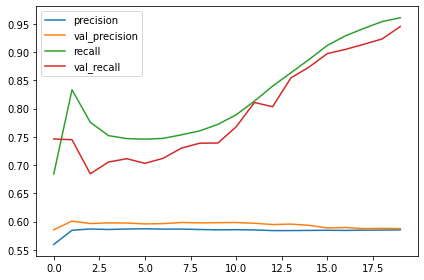

<Figure size 864x720 with 0 Axes>

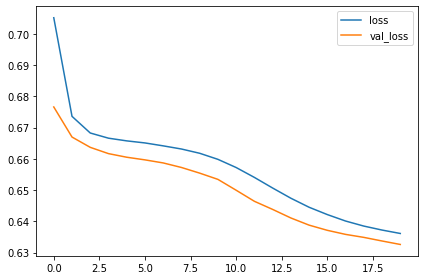

In [47]:
# Visualize Results
# Visualize Training Result
plt.figure(figsize=(12,10))
history_func_df[['precision', 'val_precision', 'recall', 'val_recall']].plot()
plt.tight_layout()

plt.figure(figsize=(12,10))
history_func_df[['loss', 'val_loss']].plot()
plt.tight_layout()

Evaluation result above shows that last recorded performance is as follow:
```
1. loss       : 0.636
2. val_loss   : 0.633
3. recall     : 0.961
4. val_recall : 0.945
```
The result showing training and validation loss slightly higher than using optimizer Adam, with visualization with current optimizer is slower in reaching steady state for both loss and metrics visualization.

The cause of remain high error/loss for both baseline models (still at .63) might be a sign that confirmed our presumptions at feature selection section, where the seemingly wrong selection results causing disturbance to model performance, but we will see wether adding more epochs will help the model decrease the loss in train and validation or not.

In addition, personally writer assume that adding too much Dropout rate will widen the gap between training loss and validation loss, hence we will add 1 layer dropout layer for both model with both rate set to 0.2.


In [48]:
# Evaluate Test-Set
y_pred_func = model_functional.predict(x_test_final)
y_pred_func = np.where(y_pred_func >=0.55, 1, 0)

print(classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.57      0.35      0.44      2553
           1       0.58      0.78      0.67      2999

    accuracy                           0.58      5552
   macro avg       0.58      0.56      0.55      5552
weighted avg       0.58      0.58      0.56      5552



Recall and Precision results seem to be fairly differs from that in Sequential API evaluation, where we get lower recall score and precision score.

This could happen presumably due to the optimizer used, while it is indeed declining in both metrics we used, on the contrary, it seems that lowering the number of neurons in first hidden layer helps to stabilize validation loss, comparing both visualization.

# 8 - Improvement

From analysis in previous section, we will to tweak parameters with detail as follows:
1. need `higher epochs` to see wether the loss could be decreased further.
2. adding `dropout layer`, rate 0.2 for functional API, as comparator.
3. use the `same optimizer` for both model, as control variable.
4. set kernel_initializer to `He_normal` for both model
6. add callback early stoping with monitor set to training loss.
7. `decrease neurons` in hidden layer 1.


## 8.1 - Sequential API

### Model Definition & Training

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Model Definition
imp_sequential = Sequential()
imp_sequential.add(Dense(5, activation='relu', input_shape=(18,), kernel_initializer='he_normal')) # Hidden Layer 1
imp_sequential.add(tf.keras.layers.BatchNormalization())
imp_sequential.add(Dense(5, activation='relu', kernel_initializer='he_normal')) # Hidden Layer 2
imp_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
imp_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['Precision', 'Recall'])

imp_sequential.summary()

In [71]:
# Set Callback Parameter
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Training
history_imp_seq = imp_sequential.fit(train_pipe,
                                     epochs=40, 
                                     validation_data=val_pipe, 
                                     callbacks=[callback])

Epoch 1/40
2674/2674 [==============================] - 17s 5ms/step - loss: 0.6962 - precision: 0.5388 - recall: 0.9183 - val_loss: 0.6889 - val_precision: 0.5423 - val_recall: 0.9918
Epoch 2/40
2674/2674 [==============================] - 15s 6ms/step - loss: 0.6874 - precision: 0.5438 - recall: 0.9596 - val_loss: 0.6859 - val_precision: 0.5557 - val_recall: 0.8226
Epoch 3/40
2674/2674 [==============================] - 9s 3ms/step - loss: 0.6673 - precision: 0.5747 - recall: 0.8874 - val_loss: 0.6419 - val_precision: 0.5816 - val_recall: 0.9953
Epoch 4/40
2674/2674 [==============================] - 7s 3ms/step - loss: 0.6428 - precision: 0.5828 - recall: 0.9589 - val_loss: 0.6342 - val_precision: 0.5837 - val_recall: 0.9996
Epoch 5/40
2674/2674 [==============================] - 6s 2ms/step - loss: 0.6387 - precision: 0.5812 - recall: 0.9820 - val_loss: 0.6370 - val_precision: 0.5808 - val_recall: 1.0000
Epoch 6/40
2674/2674 [==============================] - 6s 2ms/step - loss: 0.

### Model Evaluation

In [72]:
# DataFrame for Evaluation Results
improve_seq_df = pd.DataFrame(history_imp_seq.history)
improve_seq_df

,loss,precision,recall,val_loss,val_precision,val_recall
0,0.696250,0.538817,0.918291,0.688882,0.542300,0.991774
1,0.687416,0.543777,0.959560,0.685863,0.555703,0.822562
2,0.667274,0.574722,0.887391,0.641893,0.581598,0.995300
3,0.642815,0.582791,0.958869,0.634238,0.583715,0.999608
4,0.638687,0.581189,0.982027,0.636979,0.580755,1.000000
5,0.638954,0.581452,0.989907,0.634376,0.582478,1.000000
6,0.638701,0.580435,0.989700,0.640676,0.577471,1.000000
7,0.637297,0.581217,0.990391,0.636699,0.580623,1.000000
8,0.636861,0.581225,0.992534,0.643053,0.575389,1.000000
9,0.637153,0.581290,0.991359,0.638386,0.578912,1.000000


Baseline results:
```
1. loss       : 0.63
2. val_loss   : 0.63
3. recall     : 0.989
4. val_recall : 0.990
```

Improvement results:
```
1. loss       : 0.636
2. val_loss   : 0.632
3. recall     : 0.997
4. val_recall : 1.0
```

Although there is a slight increase by approximately .001 for recall score, overall there is actually no significant improvement.

<Figure size 864x720 with 0 Axes>

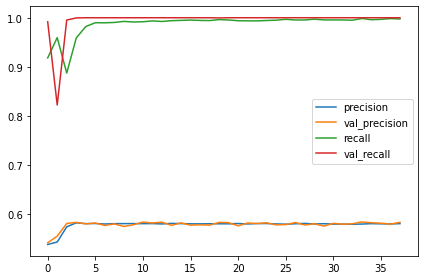

<Figure size 864x720 with 0 Axes>

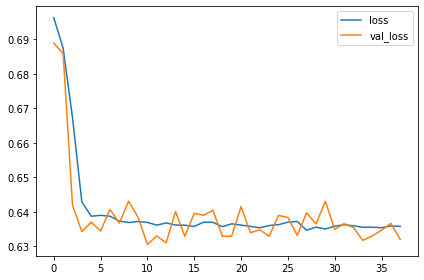

In [73]:
# Visualize Training Result
plt.figure(figsize=(12,10))
improve_seq_df[['precision', 'val_precision', 'recall', 'val_recall']].plot()
plt.tight_layout()

plt.figure(figsize=(12,10))
improve_seq_df[['loss', 'val_loss']].plot()
plt.tight_layout()

Visualization above shows that validation loss seem to be more fluctuative than the baseline version, this presumably caused by implemented kernel initializer where it tends to lower the validation loss at first then fluctuate a bit till convergence again with training loss at some point.

In [74]:
# Evaluate Test-Set
y_pred_imp_seq = imp_sequential.predict(x_test_final)
y_pred_imp_seq = np.where(y_pred_imp_seq >=0.55, 1, 0)

print(classification_report(y_test, y_pred_imp_seq))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.18      0.30      2553
           1       0.58      0.98      0.73      2999

    accuracy                           0.61      5552
   macro avg       0.73      0.58      0.52      5552
weighted avg       0.72      0.61      0.53      5552



## 8.2 - Functional API

### Model Definition & Training

In [75]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [76]:
input_layer = Input(shape=(18,))
hidden_layer1 = Dense(5, activation='relu')(input_layer)
dropout_layer1 = Dropout(0.2)(hidden_layer1)

norm_layer1 = BatchNormalization() (dropout_layer1)
hidden_layer2 = Dense(5, activation='relu')(norm_layer1)
concat_layer = concatenate([input_layer, hidden_layer2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

imp_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
imp_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['Precision', 'Recall'])
imp_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 5)            95          ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 5)            0           ['dense[0][0]']                  
                                                                                                  
 batch_normalization (BatchNorm  (None, 5)           20          ['dropout[0][0]']                
 alization)                                                                                   

In [77]:
# Set Callback Parameter
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Training
history_imp_func = imp_functional.fit(train_pipe,
                                     epochs=40, 
                                     validation_data=val_pipe, 
                                     callbacks=[callback])

Epoch 1/40
2674/2674 [==============================] - 7s 2ms/step - loss: 0.6937 - precision: 0.5639 - recall: 0.7155 - val_loss: 0.6616 - val_precision: 0.5895 - val_recall: 0.8398
Epoch 2/40
2674/2674 [==============================] - 6s 2ms/step - loss: 0.6662 - precision: 0.5813 - recall: 0.8534 - val_loss: 0.6430 - val_precision: 0.5842 - val_recall: 0.9636
Epoch 3/40
2674/2674 [==============================] - 7s 2ms/step - loss: 0.6484 - precision: 0.5807 - recall: 0.9651 - val_loss: 0.6353 - val_precision: 0.5832 - val_recall: 0.9941
Epoch 4/40
2674/2674 [==============================] - 6s 2ms/step - loss: 0.6413 - precision: 0.5811 - recall: 0.9856 - val_loss: 0.6342 - val_precision: 0.5822 - val_recall: 0.9992
Epoch 5/40
2674/2674 [==============================] - 6s 2ms/step - loss: 0.6405 - precision: 0.5806 - recall: 0.9890 - val_loss: 0.6322 - val_precision: 0.5838 - val_recall: 0.9996
Epoch 6/40
2674/2674 [==============================] - 6s 2ms/step - loss: 0.63

### Model Evaluation

In [78]:
# DataFrame for Evaluation Results
improve_func_df = pd.DataFrame(history_imp_func.history)
improve_func_df

,loss,precision,recall,val_loss,val_precision,val_recall
0,0.693677,0.563934,0.715540,0.661575,0.589497,0.839796
1,0.666233,0.581289,0.853449,0.642982,0.584184,0.963572
2,0.648402,0.580716,0.965091,0.635329,0.583180,0.994125
3,0.641281,0.581112,0.985552,0.634175,0.582154,0.999217
4,0.640526,0.580594,0.989009,0.632215,0.583848,0.999608
5,0.638790,0.580385,0.994470,0.637245,0.578518,1.000000
6,0.639848,0.579466,0.996060,0.633843,0.581926,0.998825
7,0.639946,0.580507,0.995161,0.632313,0.583543,1.000000
8,0.639756,0.580544,0.995023,0.633643,0.582478,1.000000
9,0.639724,0.580515,0.994332,0.632358,0.583943,1.000000


<Figure size 864x720 with 0 Axes>

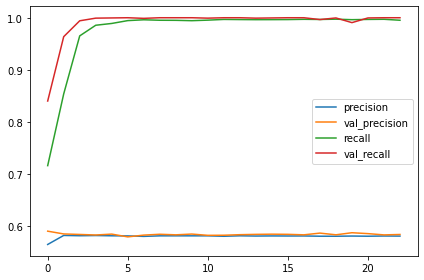

<Figure size 864x720 with 0 Axes>

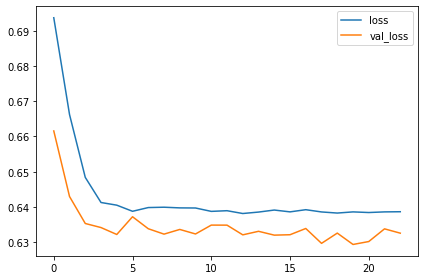

In [79]:
# Visualize Training Result
plt.figure(figsize=(12,10))
improve_func_df[['precision', 'val_precision', 'recall', 'val_recall']].plot()
plt.tight_layout()

plt.figure(figsize=(12,10))
improve_func_df[['loss', 'val_loss']].plot()
plt.tight_layout()

Adding dropout in this version is indeed widen the gap between training and validation loss, hence it confirmed our assumption in baseline model evaluation.

In addition, this version has lower recall and precision results compared to sequential.

In [80]:
# Evaluate Test-Set
y_pred_imp_func = imp_functional.predict(x_test_final)
y_pred_imp_func = np.where(y_pred_imp_func >=0.55, 1, 0)

print(classification_report(y_test, y_pred_imp_func))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.61      0.33      0.43      2553
           1       0.59      0.82      0.68      2999

    accuracy                           0.59      5552
   macro avg       0.60      0.57      0.56      5552
weighted avg       0.60      0.59      0.57      5552



In conclusion we will proceed with altered sequential API where it shows as the better performer compared to altered functional API, though compared to the baseline version, this model has a more fluctuate.

# 9 - Model Saving

In [81]:
# Saving Pipeline
# Imputer
with open('imputer_pipe.pkl', 'wb') as file_1:
  pickle.dump(impute_pipe, file_1)

# Scaler & Encoder
with open('final_pipe.pkl', 'wb') as file_2:
  pickle.dump(prep_pipe, file_2)

# Saving Imputer Columns
with open('col.txt', 'w') as file_3:
    json.dump(col, file_3)

# Saving Final Columns
with open('selected_col.txt', 'w') as file_4:
    json.dump(selected, file_4)

In [82]:
# Saving Sampled Data
# Convert Dataframe of Sample to JSON
sample = data_inference.to_json()
with open('data_sample.txt', 'w') as file_5:
    json.dump(sample, file_5)

In [83]:
# Best Model Summary
imp_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 95        
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 151
Trainable params: 141
Non-trainable params: 10
_________________________________________________________________


In [84]:
# Freeze Model
imp_sequential.trainable = False
imp_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 95        
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 151
Trainable params: 0
Non-trainable params: 151
_________________________________________________________________


In [85]:
# Save Best Model
imp_sequential.save('sequential_model.h5')

# 10 - Conclusion

1. Based on EDA, feature selection analysis and overall model evaluation it is concluded that selected features are incorrect and causing the loss in training and validation converge at approximately .63.
2. Adding Dropout layer often times causing the gap between training loss and validation loss to be widen.
3. Kernel initializer cause the validation loss to be decreased below training loss at early epochs.
4. Altered sequential API are not ready yet to be deployed for churn prediction.

Recommendation :
1. Based on EDA, it is important to to more focus to customer with higher class of membership
2. To lower the churn rate, focus more on customer with lower class membership and no membership where churning happen at most.

https://huggingface.co/spaces/radianao/P2M1